# Final Project 

By Ashley Snell, Jeremy Taylor, Sydney Small



## Content Knowledge:


In [1]:
import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as pltco

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Data Manipluation: 


In [2]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':1,'CL5':1,'CL6':1,0:0, 1:1} #only counting people who used in last month as users.
druguser.Cannabis = druguser.Cannabis.map(names)
druguser.Semer = druguser.Semer.map(names)
druguser.Nicotine = druguser.Nicotine.map(names)
druguser.LSD = druguser.LSD.map(names)
druguser.Mushrooms = druguser.Mushrooms.map(names)
druguser.Ecstasy = druguser.Ecstasy.map(names)
druguser.Coke = druguser.Coke.map(names)
druguser.Alcohol = druguser.Alcohol.map(names)

In [3]:
def plot_cat_model(clf, X, y):
 
    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model

    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [4]:
def Bootstrap(clf2, X, y):
    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    num = 50 
    Xboot = [0]*num
    yboot = [0]*num

    n = X.shape[0]
    for s in range(num):
        sample = np.random.randint(0, n, n) 
        Xboot[s] = X[sample, :]
        yboot[s] = y[sample]

    test = int(0.20*n)

    labels = ['train','test']

    Error = pa.DataFrame(  np.array([0]*num*2).reshape(num, 2), columns = labels)

    for s in range(num):
        X_test = Xboot[s][:test]
        y_test = yboot[s][:test]
        X_train = Xboot[s][test:]
        y_train = yboot[s][test:]
    
        clf2.fit(X_train, y_train)
        Error.iloc[s, 0] = clf2.score(X_train, y_train) 
        Error.iloc[s, 1] = clf2.score(X_test, y_test)
      
    Error_mean = [0]*2
    Error_std = [0]*2
    for c in range(2):
        Error_mean[c] = np.mean(Error.iloc[:num, c])
        Error_std[c] = np.std(Error.iloc[:num, c])
    
    Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
    Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
    Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
    print(Error.tail())
   

In [5]:
def plot_feature_importances(model, names, tol=10**-3):
    n_features = len(names)
    plot_names = []
    plot_importances = []
    
    for k in range(n_features):
        if model.feature_importances_[k] > tol:
            plot_names += [ names[k] ]
            plot_importances += [ model.feature_importances_[k] ]
    
    n_plot = len(plot_names)
    
    plt.figure(figsize = (10, 6))
    plt.barh(range(n_plot), plot_importances, align = 'center')
    plt.yticks(np.arange(n_plot), plot_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_plot)

## Logistic Regression:


In [6]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [7]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(solver='lbfgs')
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);

In [8]:
b, m = *lgreg.intercept_, *lgreg.coef_[0]
b, m

(-0.3503089969007426, -0.660944029998268)

Logistic Regression Decsion Intercept -0.3503089969007426
Logistic Regression Coefficent -0.660944029998268


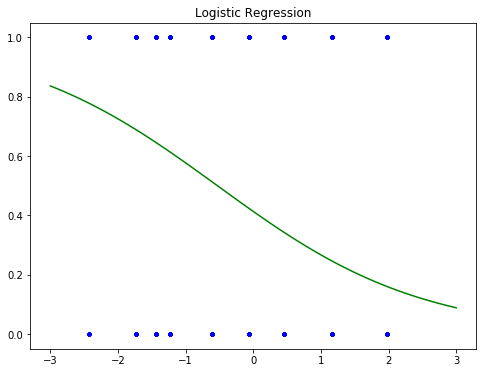

In [9]:
plt.figure(figsize = (8, 6))
plt.plot(X_train[:,1], y_train, 'b.')
xx = np.linspace(-3, 3, 100)
yy = np.exp(m*xx+b)/(1 + np.exp(m*xx+b))
plt.plot(xx, yy, 'g-');
plt.title ("Logistic Regression")
print("Logistic Regression Decsion Intercept",b)
print("Logistic Regression Coefficent",m)

markdown explaining logistric regression for this 

In [10]:
keep = ['Age', 'Country', 'Education', 'Gender', 'Ascore', 
         'Cscore', 'Escore', 'Nscore', 'Oscore', 'Ethnicity','Impulsive','SS']
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()


In [11]:
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);
b, m = *lgreg.intercept_, *lgreg.coef_[0]
print("Logistic Regression Decsion Intercept",b)
print("Logistic Regression Coefficent",m)

Logistic Regression Decsion Intercept -0.3503089969007426
Logistic Regression Coefficent -0.660944029998268


markdown for logistic showing keep variables-- cant graph. Trash

## K-nearest neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Knear = KNeighborsClassifier(n_neighbors=100) # Define the model
Knear.fit(X_train, y_train); # Train the model


Training Error: 0.7387267904509284
Testing Error: 0.7188328912466844


Text(0.5, 1.0, 'K-nearest neighbors')

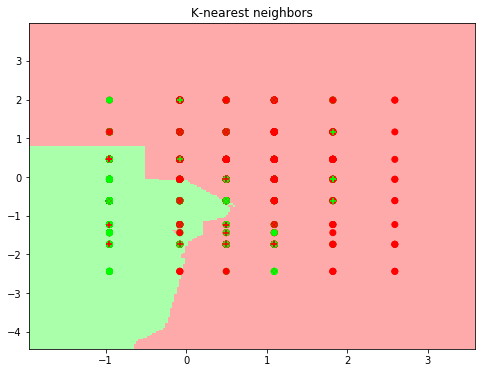

In [14]:
plot_cat_model(Knear,X,y)
plt.title ("K-nearest neighbors")

markdown for k nearest-- more flexible model. overfit the model. 
boot strap changing number of neighbors

In [15]:
X = np.array(druguser[ keep])
y = np.array(druguser[['Cannabis']]).reshape(-1)

num = 10 
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n) 
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

test = int(0.20*n)
maxk = 20

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsClassifier(n_neighbors=k+1) 
        clf.fit(X_train, y_train) 
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,train_5,test_5,...,train_16,test_16,train_17,test_17,train_18,test_18,train_19,test_19,train_20,test_20
7,1.0,0.840849,0.929045,0.811671,0.916446,0.835544,0.879310,0.830239,0.875332,0.819629,...,0.818302,0.827586,0.816976,0.824934,0.811008,0.838196,0.807029,0.822281,0.804377,0.832891
8,1.0,0.880637,0.939655,0.848806,0.931034,0.835544,0.881963,0.830239,0.872679,0.814324,...,0.826260,0.809019,0.823607,0.811671,0.824934,0.795756,0.818302,0.793103,0.818966,0.790451
9,1.0,0.843501,0.931698,0.793103,0.909814,0.745358,0.870027,0.740053,0.857427,0.753316,...,0.807692,0.748011,0.803714,0.740053,0.803050,0.740053,0.807029,0.750663,0.808355,0.758621
Mean,1.0,0.874271,0.934416,0.820424,0.915119,0.816446,0.874403,0.801061,0.870889,0.806101,...,0.816711,0.801326,0.817507,0.801061,0.815186,0.797347,0.815252,0.801326,0.812135,0.801326
Standard Deviation,0.0,0.018192,0.003883,0.015784,0.006879,0.026731,0.008405,0.028716,0.008848,0.026029,...,0.012069,0.031148,0.012758,0.033405,0.011436,0.033577,0.010136,0.028922,0.009532,0.031170


Text(0.5, 1.0, 'Difference between training and testing errors')

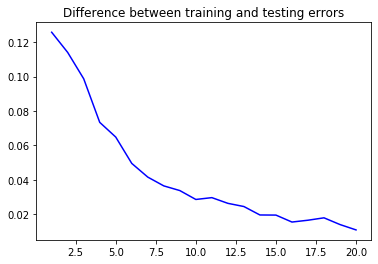

In [16]:
testing_error = np.array(Error_mean[1::2])
training_error = np.array(Error_mean[0::2])
s = abs(testing_error - training_error)
kk = range(1, maxk+1)
plt.plot(kk, s, 'b-');
plt.title ("Difference between training and testing errors")

Text(0.5, 1.0, 'Testing error vs k value')

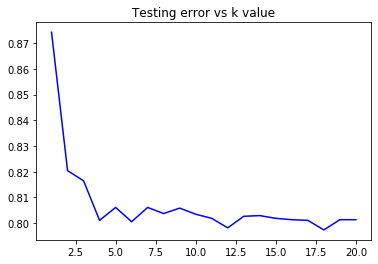

In [17]:
testing_error = Error_mean[1::2]
kk = range(1, maxk+1)
plt.plot(kk, testing_error, 'b-');
plt.title ("Testing error vs k value")

In [18]:
clf = KNeighborsClassifier(19)
Bootstrap(clf, X, y)

                       train      test
47                  0.812334  0.769231
48                  0.822944  0.806366
49                  0.820292  0.816976
Mean                0.818011  0.799894
Standard Deviation  0.009962  0.023649


markdown explaining bootstrap
PCA not includded- sucked

# Quadratic Discriminant Analysis

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training Error: 0.7380636604774535
Testing Error: 0.6843501326259946


Text(0.5, 1.0, 'Quadratic Discriminant Analysis')

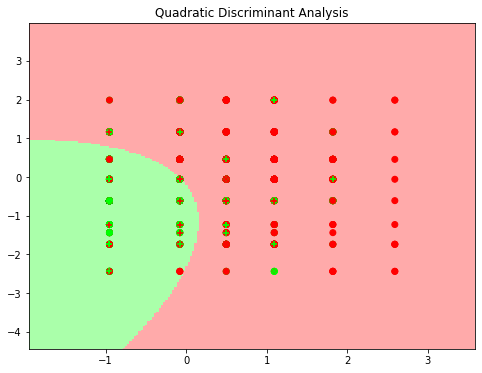

In [20]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
plot_cat_model(QDA, X, y)
plt.title ("Quadratic Discriminant Analysis")

In [21]:
X = np.array(druguser[ keep])
y = np.array(druguser[['Cannabis']]).reshape(-1)

Bootstrap(QDA, X, y)

                       train      test
47                  0.812997  0.811671
48                  0.807692  0.777188
49                  0.783156  0.748011
Mean                0.805570  0.792042
Standard Deviation  0.012159  0.022713


## Decision Trees

In [22]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

Training Error: 0.7460212201591512
Testing Error: 0.6976127320954907


Text(0.5, 1.0, 'Decision Tree')

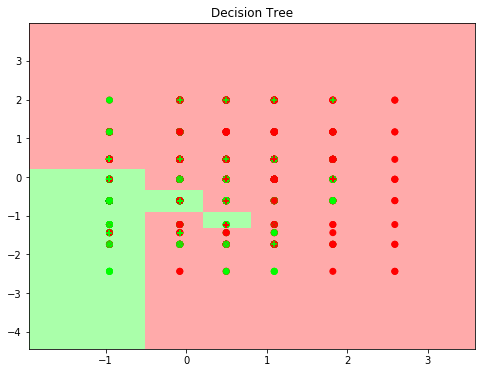

In [23]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

tree = DecisionTreeClassifier(min_samples_leaf=5)
plot_cat_model(tree, X, y)
plt.title ("Decision Tree")

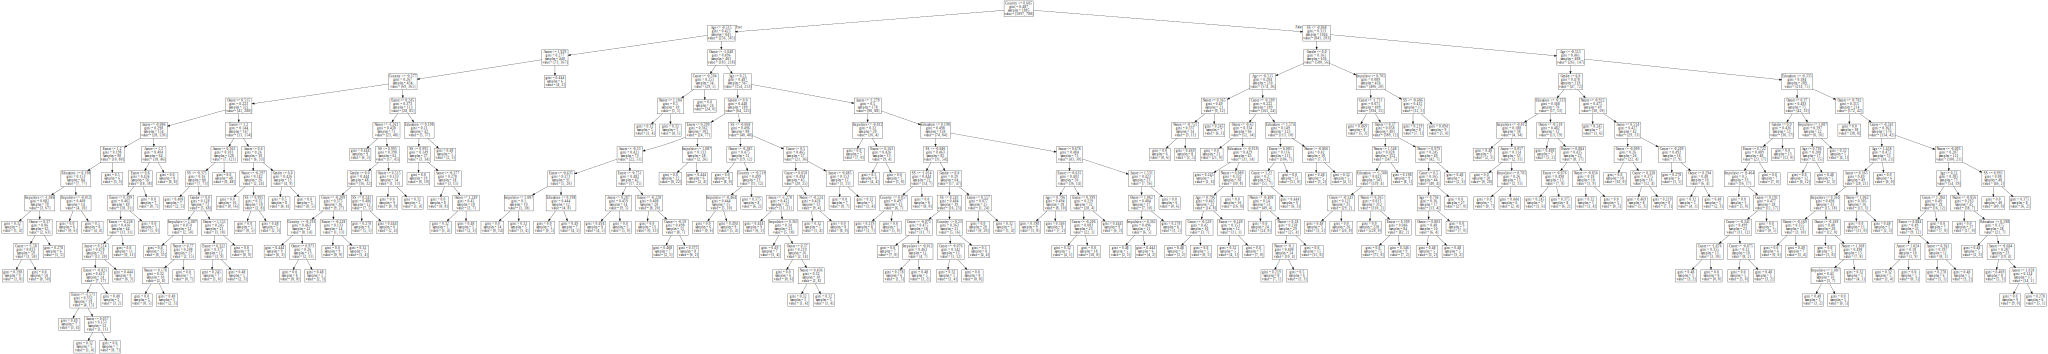

In [24]:
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])

tree.fit(X, y)

export_graphviz(tree, out_file='tree-3.dot', feature_names=keep)

with open('tree-3.dot') as f:
    dot_graph = f.read()

display( graphviz.Source(dot_graph) )

In [25]:
Bootstrap(tree, X, y)

                       train      test
47                  0.922414  0.846154
48                  0.923077  0.824934
49                  0.916446  0.803714
Mean                0.918541  0.821592
Standard Deviation  0.004228  0.017910


Text(0.5, 1.0, 'Feature Importance Based on Decision Tree')

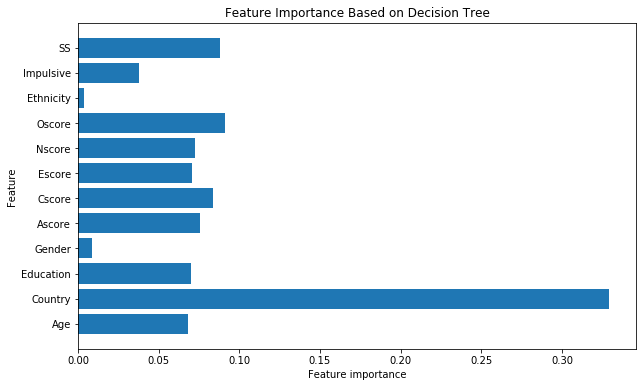

In [26]:
plot_feature_importances(tree, keep)
plt.title ("Feature Importance Based on Decision Tree")

## Neural Network

In [29]:
from sklearn.neural_network import MLPClassifier

v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

Skynet = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (10, 10, 10))

Training Error: 0.7374005305039788
Testing Error: 0.7294429708222812


Text(0.5, 1.0, 'Neural Networks')

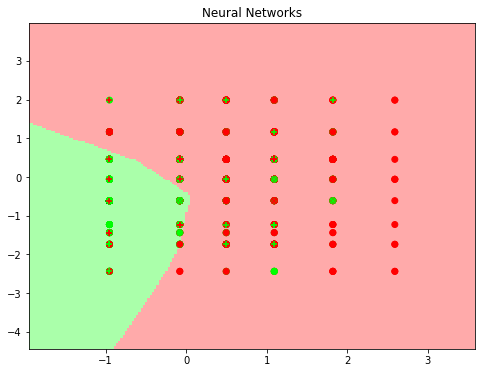

In [32]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)

plot_cat_model(Skynet, X, y)
plt.title ("Neural Networks")

In [33]:
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])
Bootstrap(Skynet, X, y)

                       train      test
47                  0.902520  0.785146
48                  0.906499  0.827586
49                  0.757958  0.761273
Mean                0.920955  0.829708
Standard Deviation  0.053819  0.037572


## Voting!

In [35]:
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier(n_neighbors=19)
clf2 = DecisionTreeClassifier(min_samples_leaf=5)
clf3 = QuadraticDiscriminantAnalysis()
clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (10,10,10))



In [36]:
vclf = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),], 
                       voting='hard', 
                       weights = [1, 1, 1 , 1], 
                       n_jobs = -1)

Training Error: 0.7387267904509284
Testing Error: 0.7374005305039788


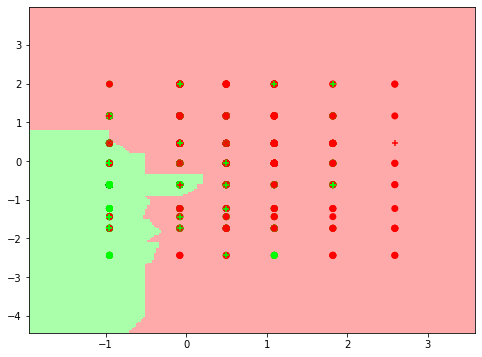

In [37]:
X = np.array(druguser[['Age','Education']])
y = np.array(druguser[['Cannabis']]).reshape(-1)
plot_cat_model(vclf, X, y)


## Gridsearch

In [38]:
X = np.array(druguser[ keep])
y = np.array(druguser['Cannabis'])

from sklearn.model_selection import GridSearchCV
ww = np.linspace(0.1, 20, 5)
weight_space = [ [k1, k2, k3, k4] for k1 in ww for k2 in ww for k3 in ww for k4 in ww]
parameters = {'weights':weight_space}
reg = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),],
                     n_jobs = -1)
reg_grd = GridSearchCV(reg, parameters, cv=5, n_jobs=-1).fit(X, y)

In [39]:
print('Maximum Cross Validated Mean Score: {}'.format(reg_grd.cv_results_['mean_test_score'].max()))
print('Occurs for weights: {}'.format(reg_grd.cv_results_['params'][reg_grd.cv_results_['mean_test_score'].argmax()]['weights']))


Maximum Cross Validated Mean Score: 0.7973474801061008
Occurs for weights: [20.0, 0.1, 20.0, 5.074999999999999]


In [40]:
vclf2 = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),], 
                       voting='hard', 
                       weights = [20.0, 0.1, 20.0, 5.074999999999999], 
                       n_jobs = -1)

In [41]:
Bootstrap(vclf2, X, y)

                       train      test
47                  0.847480  0.843501
48                  0.850133  0.830239
49                  0.852122  0.832891
Mean                0.849085  0.817135
Standard Deviation  0.013612  0.018729


conclusion

# Next Project???

In [42]:
druguser.Cannabis = druguser.Cannabis.map(names)
Cannabisuser = druguser.loc[druguser.loc[:,"Cannabis"]==1,:]

In [43]:
Cannabisuser.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,CL0,CL2,CL0,0,CL3,0,1,0,CL0
11,12,1.09449,-0.48246,-0.61113,-0.28519,-0.31685,-1.32828,0.00332,0.14143,-1.92595,...,0,CL0,CL0,CL0,0,CL0,0,1,0,CL0
17,18,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.52135,-1.23177,-0.31776,-0.45321,...,0,CL0,CL2,CL0,0,CL0,0,1,0,CL0
27,28,0.49788,-0.48246,0.45468,0.96082,-0.31685,0.52135,-1.23177,-0.01928,-0.01729,...,0,CL0,CL0,CL2,0,CL0,0,0,0,CL0
48,49,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.13606,-0.80615,-0.31776,-0.15487,...,0,CL0,CL0,CL0,0,CL0,0,1,0,CL0


In [44]:
Cannabisuser.shape

(788, 32)

Training Error: 0.8510301109350238
Testing Error: 0.8343949044585988


Text(0.5, 1.0, 'Neural Networks based in only cannabis users')

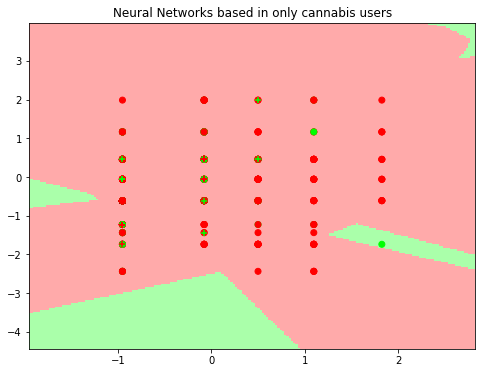

In [60]:
X = np.array(Cannabisuser[['Age','Education']])
y = np.array(Cannabisuser[['Coke']]).reshape(-1)

plot_cat_model(Skynet, X, y)
plt.title ("Neural Networks based in only cannabis users")

In [55]:
X = np.array(Cannabisuser[ keep])
y = np.array(Cannabisuser[['Coke']]).reshape(-1)

Bootstrap(vclf, X, y)

                       train      test
47                  0.890650  0.859873
48                  0.889065  0.853503
49                  0.896989  0.815287
Mean                0.896640  0.863439
Standard Deviation  0.013958  0.030471


In [56]:
reg = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),],
                     n_jobs = -1)
reg_grd = GridSearchCV(reg, parameters, cv=5, n_jobs=-1).fit(X, y)

In [57]:
print('Maximum Cross Validated Mean Score: {}'.format(reg_grd.cv_results_['mean_test_score'].max()))
print('Occurs for weights: {}'.format(reg_grd.cv_results_['params'][reg_grd.cv_results_['mean_test_score'].argmax()]['weights']))


Maximum Cross Validated Mean Score: 0.850253807106599
Occurs for weights: [15.024999999999999, 0.1, 15.024999999999999, 0.1]


In [58]:
vclf3 = VotingClassifier(estimators = [ ('K-near', clf1), ('dectree', clf2), ('qda', clf3), ('skynet', clf4),], 
                       voting='hard', 
                       weights = [15.024999999999999, 0.1, 15.024999999999999, 0.1], 
                       n_jobs = -1)

In [59]:
Bootstrap(vclf3, X, y)

                       train      test
47                  0.895404  0.859873
48                  0.912837  0.891720
49                  0.906498  0.891720
Mean                0.891442  0.866752
Standard Deviation  0.012058  0.023310
